In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 6

## Table Review: Welcome Survey

In [2]:
welcome = Table.read_table('welcome_survey_sp23.csv')
welcome.show(5)

Year,Extraversion,Number of textees,Hours of sleep,Handedness,Pant leg,Sleep position,Pets,Piercings
Second Year,2,5,9,Right-handed,Right leg in first,On your right side,"Cat, Dog, Fish, Snake, Lizard",-3
First Year,2,3,8,Right-handed,I don't know,On your back,nan,-1
First Year,5,5,8,Right-handed,Right leg in first,On your left side,Bearded dragon,0
Third Year,8,4,5,Right-handed,I don't know,On your back,Bird,0
First Year,3,15,6,Left-handed,Right leg in first,On your back,Bird,0


In [3]:
# On average, how long do side-sleepers sleep?
side_sleepers = welcome.where('Sleep position', are.containing('side'))
np.average(side_sleepers.column('Hours of sleep'))

7.0674974039460023

In [4]:
# How many students get at least 8 hours of sleep each night (on average)?
# First way:
welcome.where('Hours of sleep', are.above_or_equal_to(8)).num_rows

498

In [5]:
# Second way
np.count_nonzero(welcome.column('Hours of sleep') >= 8)

498

In [6]:
# Third way
np.sum(welcome.column('Hours of sleep') >= 8)

498

In [7]:
# Create a table with only the two sleep-related columns, 
# with names 'Hours' and 'Position'
two_col = welcome.select('Hours of sleep', 'Sleep position')
sleep = two_col.relabeled(0, 'Hours').relabeled(1, 'Position')
sleep.show(3)

Hours,Position
9,On your right side
8,On your back
8,On your left side


In [8]:
# Second way
two_col = welcome.drop(
    'Handedness', 'Extraversion',
    'Pant leg', 'Number of textees',
    'Pets', 'Piercings',
    'Year', 'Extroversion')
sleep = two_col.relabeled(0, 'Hours').relabeled(1, 'Position')
sleep.show(3)

Hours,Position
9,On your right side
8,On your back
8,On your left side


## Discussion Question: NBA Salaries

In [9]:
nba = Table.read_table('nba_salaries.csv')
nba.show(3)

rank,name,position,team,salary,season
1,Shaquille O'Neal,C,Los Angeles Lakers,17142000,2000
2,Kevin Garnett,PF,Minnesota Timberwolves,16806000,2000
3,Alonzo Mourning,C,Miami Heat,15004000,2000


In [10]:
# Question (a)
guards = nba.where('position', 'PG')
guards.where('salary', are.above(15)).column('name')

array(['Gary Payton', 'Damon Stoudamire', 'Stephon Marbury', ...,
       'Brandon Goodwin', 'Reggie Jackson', 'Ky Bowman'],
      dtype='<U24')

In [11]:
# Question (b)
nba.drop('position')
nba.num_columns

6

## Census ##

In [12]:
full = Table.read_table('nc-est2019-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


In [13]:
partial = full.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
partial.show(5)

SEX,AGE,POPESTIMATE2014,POPESTIMATE2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323


In [14]:
us_pop = partial.relabeled(2, '2014').relabeled(3, '2019')
us_pop.show(5)

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323


In [25]:
us_pop_by_age = us_pop.where('SEX', are.equal_to(0)).drop('SEX')
us_pop_by_age

AGE,2014,2019
0,3954787,3783052
1,3948891,3829599
2,3958711,3922044
3,4005928,3998665
4,4004032,4043323
5,4004576,4028281
6,4133372,4017227
7,4152666,4022319
8,4118349,4066194
9,4106068,4061874


In [26]:
change = us_pop_by_age.column('2019') - us_pop_by_age.column('2014')
change

array([-171735, -119292,  -36667,   -7263,   39291,   23705, -116145,
       -130347,  -52155,  -44194,  -53618,  104804,  141200,    7126,
        -66894,   12631,  -15505,  -39515,   34483,    9650, -141227,
       -201943, -305343, -350651, -241835,   37812,  214055,  409073,
        473478,  423954,  367437,  187860,  107298,  164752,  106148,
        231701,  368026,  396847,  456720,  413012,  259488,  114457,
       -109083, -465225, -408175, -309623, -172883,  -10547,  136860,
        -67294, -382619, -471938, -465942, -454394, -257650,  -35878,
        -23436,    6477,  204719,  267974,  276258,  389471,  479237,
        431491,  468789,  397927,  277420,  -15667,  777964,  721963,
        675278,  566691,  999406,  334331,  395023,  425854,  529432,
        355290,  240082,  185899,  211738,  166007,   88415,   62136,
         33339,      69,    3971,   11314,   30645,   39031,   26166,
         42338,   41539,   36143,   47264,   51094,   37036,   34021,
         26604,   15

In [35]:
us_pop_change = us_pop_by_age.with_columns('Change', change, 'Percentage', change / us_pop_by_age.column('2014'))
us_pop_change

AGE,2014,2019,Change,Percentage
0,3954787,3783052,-171735,-0.0434246
1,3948891,3829599,-119292,-0.030209
2,3958711,3922044,-36667,-0.00926236
3,4005928,3998665,-7263,-0.00181306
4,4004032,4043323,39291,0.00981286
5,4004576,4028281,23705,0.00591948
6,4133372,4017227,-116145,-0.0280993
7,4152666,4022319,-130347,-0.0313888
8,4118349,4066194,-52155,-0.0126641
9,4106068,4061874,-44194,-0.0107631


In [36]:
us_pop_change.set_format('Percentage', PercentFormatter)

us_pop_change.where('AGE', are.below(999)).sort('Change', descending = True)

AGE,2014,2019,Change,Percentage
72,2191642,3191048,999406,45.60%
68,2567511,3345475,777964,30.30%
69,2530460,3252423,721963,28.53%
70,2461426,3136704,675278,27.43%
71,2516392,3083083,566691,22.52%
76,1692960,2222392,529432,31.27%
62,3677408,4156645,479237,13.03%
28,4345247,4818725,473478,10.90%
64,3481789,3950578,468789,13.46%
38,3848856,4305576,456720,11.87%


## 2019 Sex Ratios ##

In [37]:
us_pop_2019 = us_pop.drop('2014')
us_pop_2019.show(3)

SEX,AGE,2019
0,0,3783052
0,1,3829599
0,2,3922044


In [17]:
all_ages = us_pop_2019.where('AGE', are.equal_to(999))
all_ages

SEX,AGE,2019
0,999,328239523
1,999,161657324
2,999,166582199


In [39]:
pop_2019 = all_ages.with_columns('Proportion', all_ages.column('2019') / all_ages.column('2019').item(0)).set_format('Proportion', PercentFormatter)
pop_2019

SEX,AGE,2019,Proportion
0,999,328239523,100.00%
1,999,161657324,49.25%
2,999,166582199,50.75%


In [40]:
infants = us_pop_2019.where('AGE', are.equal_to(0))
infants

SEX,AGE,2019
0,0,3783052
1,0,1935117
2,0,1847935


In [42]:
infants_2019 = infants.column('2019').item(0)
infants.with_column(
    'Proportion', infants.column('2019')/infants_2019
).set_format('Proportion', PercentFormatter)

SEX,AGE,2019,Proportion
0,0,3783052,100.00%
1,0,1935117,51.15%
2,0,1847935,48.85%


In [43]:
females_all_rows = us_pop_2019.where('SEX', are.equal_to(2))
females = females_all_rows.where('AGE', are.not_equal_to(999))
females.show(3)

SEX,AGE,2019
2,0,1847935
2,1,1871014
2,2,1916500


In [44]:
males_all_rows = us_pop_2019.where('SEX', are.equal_to(1))
males = males_all_rows.where('AGE', are.not_equal_to(999))
males.show(3)

SEX,AGE,2019
1,0,1935117
1,1,1958585
1,2,2005544


In [45]:
males.column('AGE')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [46]:
females.column('AGE')

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [47]:
f_to_m_ratios = females.column(2) / males.column(2)

ratios = Table().with_columns(
    'Age', females.column('AGE'),
    'F:M Ratio', f_to_m_ratios
)

ratios

Age,F:M Ratio
0,0.954947
1,0.955289
2,0.955601
3,0.957242
4,0.956177
5,0.954338
6,0.956801
7,0.956633
8,0.955161
9,0.959278


In [48]:
ratios.sort('Age', descending=True)

Age,F:M Ratio
100,3.27411
99,2.91367
98,2.65926
97,2.5868
96,2.41969
95,2.34042
94,2.2271
93,2.10192
92,1.99252
91,1.90275


In [50]:
ratios.where('Age', are.above(75)).show()

Age,F:M Ratio
76,1.21422
77,1.23558
78,1.26373
79,1.28129
80,1.29209
81,1.32745
82,1.36101
83,1.39749
84,1.44603
85,1.48588


## Line Plot

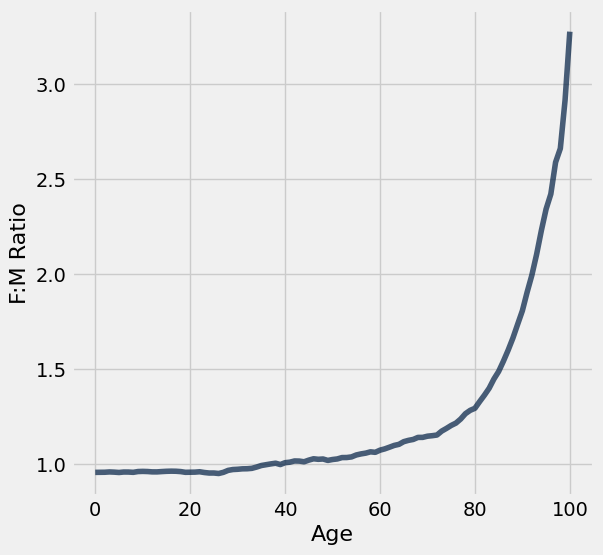

In [51]:
ratios.plot('Age', 'F:M Ratio')